# DAY 9: Dimensionality reduction

### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: August 5th, 2:00 pm Kigali Time

**First name**: _________________________________________________________


**Last name**: _____________

## Learning Goals:

1. explore dimensionality reduction techniques
2. implement PCA and plot top principal components
3. train a classifier after reducing dimensionality of the data

Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx 
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
%matplotlib inline

# Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

## Read in the data and visualize

In [4]:
link = "https://raw.githubusercontent.com/melaniefp/melaniefp.github.io/master/pca/dataset_1.txt"
data = pd.read_csv(link, header=None)
data.shape

(543, 65)

In [3]:
# # Load the satellite image dataset from an url
# data = pd.read_csv('https://raw.githubusercontent.com/melaniefp/rwanda_summer2019/master/lectures_src/pca/datasets/dataset_1.txt?token=ACFRYDTYJV32JTOFRWO7MVLBBFEFC', header=None)
# data.shape

HTTPError: HTTP Error 404: Not Found

In [5]:

# S plit into predictor and response
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Print shapes of predictor and response arrays
print('predictor array shape:', x.shape)
print('response array shape:', y.shape)

predictor array shape: (543, 64)
response array shape: (543,)


Let's plot a couple of images from the data set.

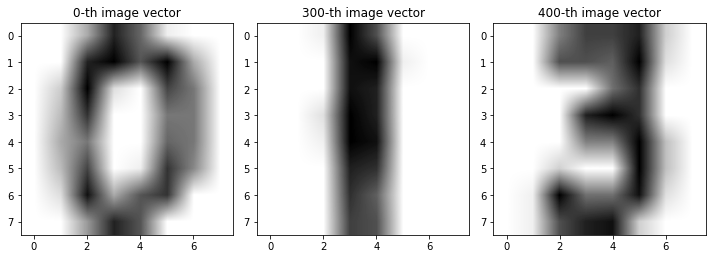

In [6]:
# Plot a couple of images from the dataset
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# To plot an image, we use the .imshow() function and we need reshape a lenght 64 vector into a 8x8 image!
ax[0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='bilinear')
ax[0].set_title('0-th image vector')

ax[1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='bilinear')
ax[1].set_title('300-th image vector')

ax[2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='bilinear')
ax[2].set_title('400-th image vector')

plt.tight_layout()
plt.show()

---
##  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data. That is, we want to **project** the data onto a smaller space (think line or plane).

But to how many dimensions should we reduce the data? Which subspace should we project the data onto?

Let's just experiment a bit: trial and error.

### Projection down to sets of axes

We'll try to project the data down to 2 dimensions and three dimensions. We'll randomnly select some predictors and project the data down to the plane or cube defined by these predictors.

**Exercise 1:** Try to pick two different random axes and project the data onto these axes. Visualize the projected data. Do you think we should use these projections to transform the data? Think about how much variation is preserved by the projections and think about whether a classifier built on these projections would be able to separate the classes?

No handles with labels found to put in legend.
No handles with labels found to put in legend.


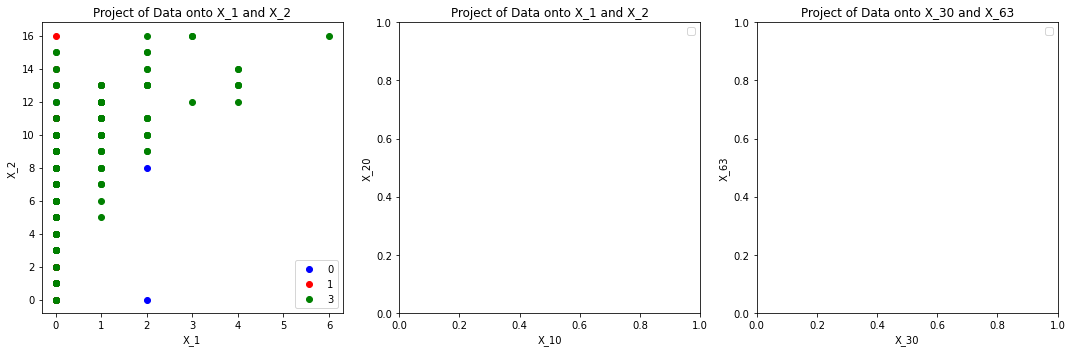

In [7]:
# Let's project the data onto some random 2D planes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Project onto axes: 1, 2
x_2d = x[:, [1, 2]]

ax[0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0].set_xlabel('X_1')
ax[0].set_ylabel('X_2')
ax[0].set_title('Project of Data onto X_1 and X_2')
ax[0].legend()

# Project onto axes: 10, 20
x_2d = x[:, [10, 20]]

# COMPLETE
 
ax[1].set_xlabel('X_10')
ax[1].set_ylabel('X_20')
ax[1].set_title('Project of Data onto X_1 and X_2')
ax[1].legend()

# Project onto axes: 30, 63
x_2d = x[:, [30, -1]]

# COMPLETE

ax[2].set_xlabel('X_30')
ax[2].set_ylabel('X_63')
ax[2].set_title('Project of Data onto X_30 and X_63')
ax[2].legend()

plt.tight_layout()
plt.show()

**Exercise 2:** Try to pick three different random axes and project the data onto these axes. Visualize the projected data. Do you think we should use these projections to transform the data? Why or why not? Think about how much variation is preserved by the projections and think about whether a classifier built on these projections would be able to spearate the classes?

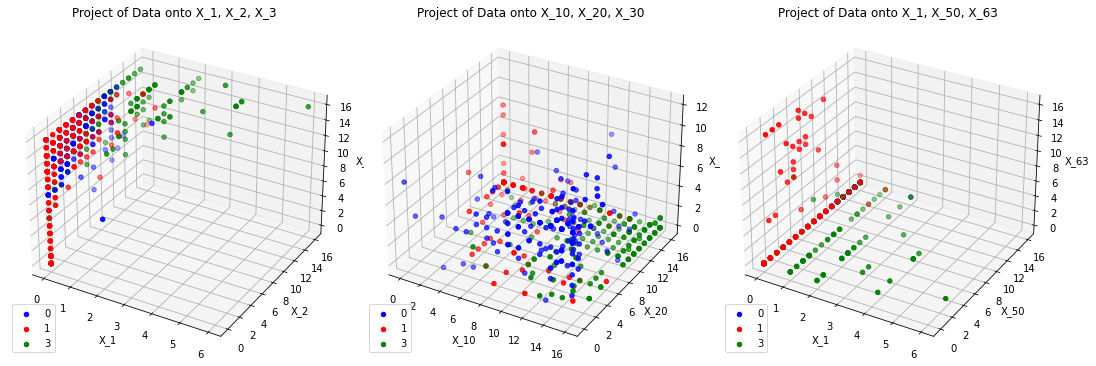

In [8]:
# Let's project the data onto some random 2D planes
fig = plt.figure(figsize=(15, 5))


# Project onto axes: 1, 2, 3
x_2d = x[:, [1, 2, 3]]

ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], color='b', label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], color='r', label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

# Project onto axes: 10, 20, 30
x_2d = x[:, [10, 20, 30]]

ax2 = fig.add_subplot(1, 3, 2,  projection='3d')

ax2.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], color='b', label='0')
ax2.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], color='r', label='1')
ax2.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], color='g', label='3')

ax2.set_xlabel('X_10')
ax2.set_ylabel('X_20')
ax2.set_zlabel('X_30')
ax2.set_title('Project of Data onto X_10, X_20, X_30')
ax2.legend(loc='lower left')

# Project onto axes: 1, 50, 63
x_2d = x[:, [1, 50, 63]]

ax3 = fig.add_subplot(1, 3, 3,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], color='b', label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], color='r', label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], color='g', label='3')

ax3.set_xlabel('X_1')
ax3.set_ylabel('X_50')
ax3.set_zlabel('X_63')
ax3.set_title('Project of Data onto X_1, X_50, X_63')
ax3.legend(loc='lower left')

plt.tight_layout()
plt.show()

### PCA projections

Let's try PCA. Recall that PCA finds the directions of maximum variation in the data! So let us see if projecting onto the axes of maximum variation yields more separation between the classes!

**Exercise 3:** Project the data onto the top three PCA components. Visualize the projected data. Do you think we should use these projections to transform the data? Why or why not? Think about how much variation is preserved by the projections and think about whether a classifier built on these projections would be able to separate the classes?

In [9]:
# Step 1: Make an instance of the sklearn PCA model with three components
# Hint: look up the documentation for sklearn's PCA model
# COMPLETE
pca = PCA(n_components=3)

# Step 2: Fit the PCA model to the data 
pca.fit(data)

# Step 3: Project to the data onto the three axes
x_reduced = pca.transform(data)

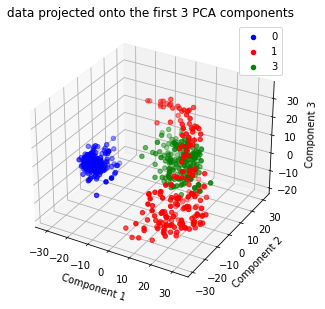

In [10]:
# Visualized our reduced data
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1,  projection='3d')

# Scatter plot the projected data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], color='blue', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], color='red', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], color='green', label='3')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('data projected onto the first 3 PCA components')
ax.legend()

plt.show()

**Exercise 4:** Project the data onto the top two PCA components. Visualize the projected data. Do you think we should use these projections to transform the data? Why or why not? Think about how much variation is preserved by the projections and think about whether a classifier built on these projections would be able to spearate the classes?

In [18]:
# Step 1: Make an instance of the sklearn PCA model with three components
# Hint: look up the documentation for sklearn's PCA model
# COMPLETE
pca = PCA(n_components=2)

# Step 2: Fit the PCA model to the data 
pca.fit(x)

# Step 3: Project to the data onto the three axes
x_reduced = pca.transform(x)

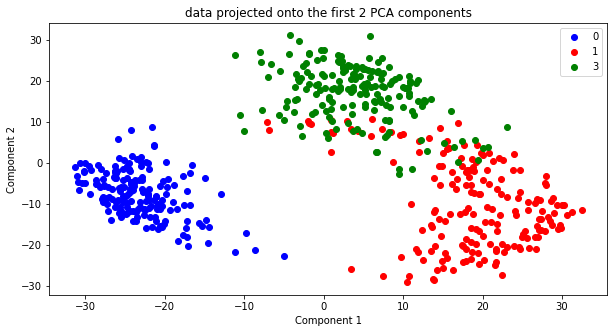

In [19]:
#Visualized our reduced data
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Scatter plot the projected data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='blue', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='red', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='green', label='3')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('data projected onto the first 2 PCA components')
ax.legend()

**Exercise 5:** Do you prefer to use the top 3 PCA component projection or the top 2? Why? Think about efficiency, interpretability and your downstream task - classification.

### Interpreting clusters in the data projection

Recall that the components of PCA are **linear combos of our original predictors**. E.g. component 1 might be 
$$X_1 - 2 X_{10} + 10 X_{63}.$$
But in our case, our predictors are pixels, thus, each PCA component is a combination of different pixels - that is, each PCA component is a digital image! This is good news! It means that the components of the PCA are potentially interpretable.

**Exercise 6:** Extract the top 2 PCA component vectors. Visualize the components as images. Based on the images, what do you think each PCA components represents? 

Now look at the clusters in the projection of your data onto the top 2 PCA components, does it make sense that your clusters are linear combinations of these two images?

In [20]:
# Step 1: Extract the top 2 PCA components
# Hint: look up the documentation for sklearn PCA's .components_ attribute
# COMPLETE
component_0 = pca.components_[0]
component_1 = pca.components_[1]

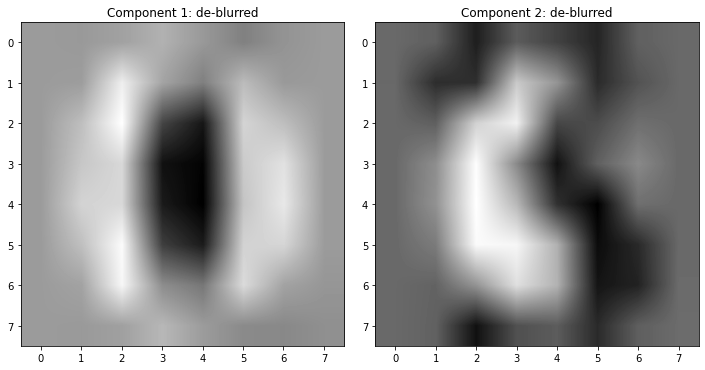

In [21]:
# Display the principal components of PCA as digital images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# COMPONENT 1
ax[0].imshow(component_0.reshape(8,8), cmap=plt.cm.gray_r, interpolation='bilinear')
ax[0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1].imshow(component_1.reshape(8,8), cmap=plt.cm.gray_r, interpolation='bilinear')
ax[1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

## Optional: Build a classifier

So far, we have only learned models that distinguishes between two classes. We are going to train a Logistic regression classifier to predict these three classes. 

**Exercise 7 (Optional):** Fit a logistic regression classifier on the original data. Compute the AUC of your classifier. 

Fit a logistic regression classifier on the data projected onto the top 2 PCA components. Compute the AUC of your classifier.

Which classifier does better? Did reducing the dimensionality of the data improve your classifier? 

Will doing PCA dimensionality reduction ***always*** improve our classifier for every dataset? Why or why not?

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [46]:
logistic_regressor = LogReg()
X_train, X_test, y_train, y_test = train_test_split(x, y)
logistic_regressor.fit(X_train, y_train)
y_pred = logistic_regressor.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print('Original dataset AUC:', auc)

Original dataset AUC: 1.0


C:\Users\krosenfeld\Documents\projects\other\Rwanda-Data-Science-NBs\envs\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
logistic_regressor = LogReg()
X_train, X_test, y_train, y_test = train_test_split(x_reduced, y)
logistic_regressor.fit(X_train, y_train)
y_pred = logistic_regressor.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print('Reduced dim dataset AUC:', auc)

Reduced dim dataset AUC: 0.9920683648780307
